<!-- ## Index
- [1. Import libraries and download data](#section1)
- [2. EDA](#section2)
- [3. Recommender Model](#section3)
- [4. Conclusion](#section4) -->

LIBRARIES

In [1]:
#importing lib
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import datetime 
from isoweek import Week
%matplotlib inline
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from math import sqrt
import datetime
import os

In [2]:
import pandas as pd
df = pd.read_csv(r"E:\ML RP\Retail Product Recommender.csv")

In [3]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [4]:
df.isnull().any().any()

False

In [5]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
dtype: int64

In [6]:
df[df["InvoiceNo"].str.startswith("C")]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
141,C536379,D,Discount,-1,01/12/2010 09:41,27.50,14527
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,01/12/2010 09:49,4.65,15311
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,01/12/2010 10:24,1.65,17548
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,01/12/2010 10:24,0.29,17548
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,01/12/2010 10:24,0.29,17548
238,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,01/12/2010 10:24,0.29,17548
239,C536391,21484,CHICK GREY HOT WATER BOTTLE,-12,01/12/2010 10:24,3.45,17548
240,C536391,22557,PLASTERS IN TIN VINTAGE PAISLEY,-12,01/12/2010 10:24,1.65,17548
241,C536391,22553,PLASTERS IN TIN SKULLS,-24,01/12/2010 10:24,1.65,17548
938,C536506,22960,JAM MAKING SET WITH JARS,-6,01/12/2010 12:38,4.25,17897


In [7]:
print('Rows and column', df.shape)
df.head()

Rows and column (406829, 7)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01/12/2010 08:26,2.55,17850
1,536365,71053,WHITE METAL LANTERN,6,01/12/2010 08:26,3.39,17850
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01/12/2010 08:26,2.75,17850
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01/12/2010 08:26,3.39,17850
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01/12/2010 08:26,3.39,17850


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406829 entries, 0 to 406828
Data columns (total 7 columns):
InvoiceNo      406829 non-null object
StockCode      406829 non-null object
Description    406829 non-null object
Quantity       406829 non-null int64
InvoiceDate    406829 non-null object
UnitPrice      406829 non-null float64
CustomerID     406829 non-null int64
dtypes: float64(1), int64(2), object(4)
memory usage: 21.7+ MB


In [9]:
df_null = pd.DataFrame(df.isnull().sum())
df_null = df_null.rename(columns={0:'Number of null values'})
df_null['Percentage null values'] = round(df.isnull().sum()/df.InvoiceNo.count()*100,2)
df_null

,Number of null values,Percentage null values
InvoiceNo,0,0.0
StockCode,0,0.0
Description,0,0.0
Quantity,0,0.0
InvoiceDate,0,0.0
UnitPrice,0,0.0
CustomerID,0,0.0


In [10]:
df['Type of transaction'] = np.where(df['InvoiceNo'].str.contains('C'),'Cancelled','Sales')

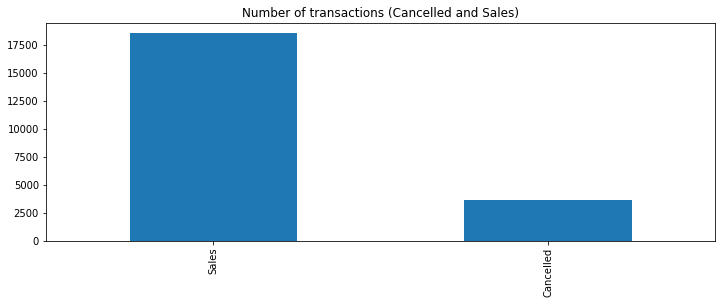

In [11]:
fig, axes=plt.subplots(nrows=1, figsize=(12,4))
df[['InvoiceNo', 'Type of transaction']].drop_duplicates()['Type of transaction'].value_counts().plot.bar(ax=axes)
plt.title('Number of transactions (Cancelled and Sales)')
plt.show()

In [12]:
df.CustomerID.value_counts()

17841    7983
14911    5903
14096    5128
12748    4642
14606    2782
15311    2491
14646    2085
13089    1857
13263    1677
14298    1640
15039    1508
14156    1420
18118    1284
14159    1212
14796    1165
15005    1160
16033    1152
14056    1128
14769    1094
17511    1076
13081    1061
14527    1011
16549     981
14456     977
15719     938
15555     925
16931     898
17811     872
14505     803
12415     778
         ... 
17448       1
18141       1
17925       1
16323       1
13302       1
16765       1
18068       1
15316       1
16144       1
16953       1
17331       1
16078       1
16737       1
13185       1
18113       1
16148       1
16061       1
17065       1
18233       1
16995       1
16428       1
17948       1
17763       1
17291       1
13829       1
16093       1
15118       1
13703       1
13841       1
13747       1
Name: CustomerID, Length: 4372, dtype: int64

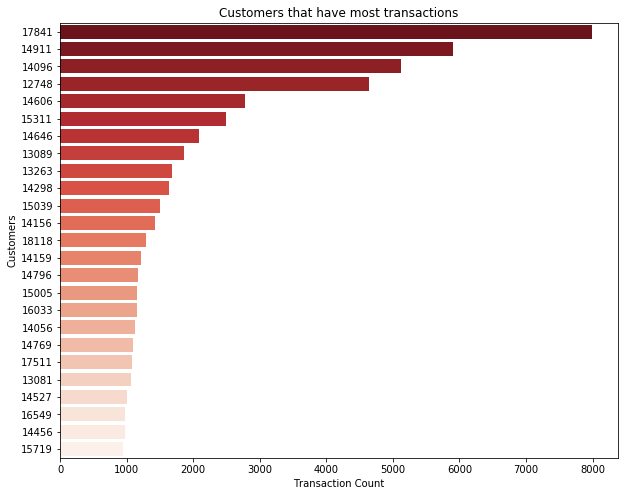

In [13]:
customer_counts = df.CustomerID.value_counts().sort_values(ascending=False).head(25)

fig, ax = plt.subplots(figsize = (10, 8))

sns.barplot(y = customer_counts.index, x = customer_counts.values, orient = "h", 
            ax = ax, order = customer_counts.index, palette = "Reds_r")

plt.title("Customers that have most transactions")
plt.ylabel("Customers")
plt.xlabel("Transaction Count")

plt.show()

In [14]:
# Recency
df_recency = df.groupby('CustomerID', as_index = False)['InvoiceDate'].max()

In [15]:
df[df.UnitPrice == 0].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Type of transaction
7012,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,05/12/2010 14:02,0.0,12647,Sales
23071,539263,22580,ADVENT CALENDAR GINGHAM SACK,4,16/12/2010 14:36,0.0,16560,Sales
26046,539722,22423,REGENCY CAKESTAND 3 TIER,10,21/12/2010 13:45,0.0,14911,Sales
29881,540372,22090,PAPER BUNTING RETROSPOT,24,06/01/2011 16:41,0.0,13081,Sales
29883,540372,22553,PLASTERS IN TIN SKULLS,24,06/01/2011 16:41,0.0,13081,Sales


In [16]:
print("We have {} observations.".format(df.shape[0]))

df = df[df.UnitPrice > 0]

print("We have {} observations after removing records that have 0 unit price.".format(df.shape[0]))

We have 406829 observations.
We have 406789 observations after removing records that have 0 unit price.


In [17]:
transaction = df.groupby(['Type of transaction', 'InvoiceNo'])['InvoiceNo'].count().to_frame().reset_index(0)
sales = transaction[transaction['Type of transaction']=='Sales'].InvoiceNo
cancelled = transaction[transaction['Type of transaction']=='Cancelled'].InvoiceNo

In [18]:
ind = df[((df['Type of transaction']=='Sales') & (df['Quantity']<=0))].index
df = df.drop(ind)

In [19]:
stock = df.groupby(['Type of transaction','StockCode'])['Quantity'].sum().reset_index(0)
description = df.groupby(['Type of transaction','Description'])['Quantity'].sum().reset_index(0)

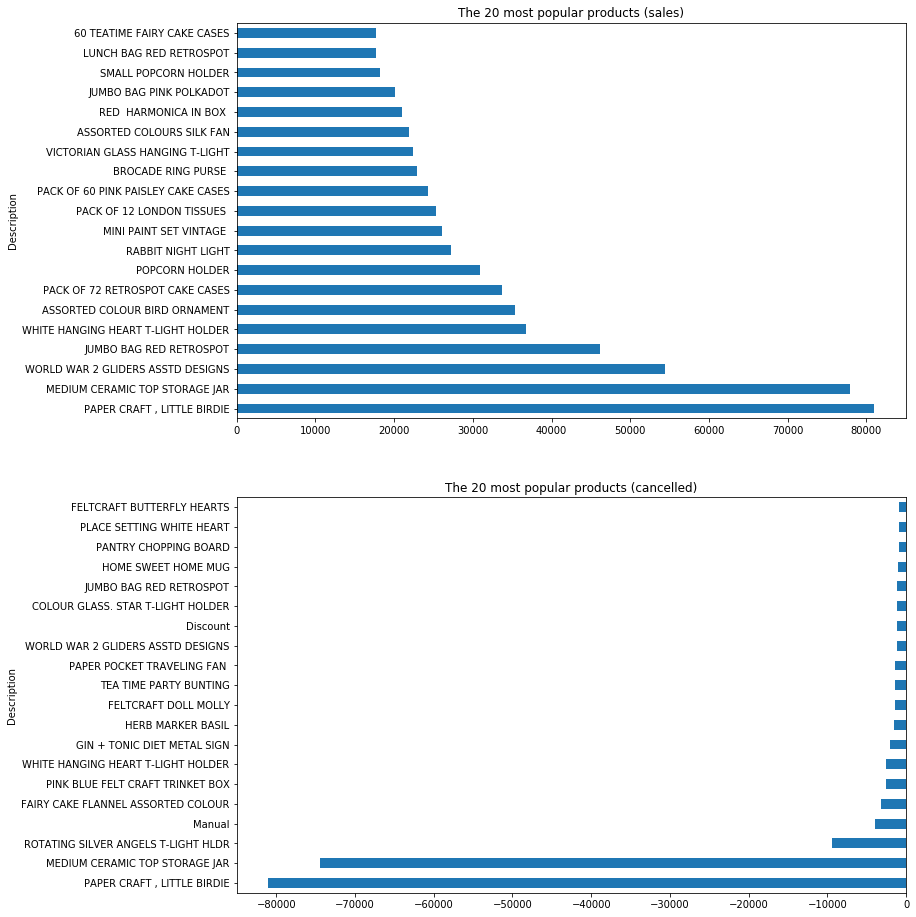

In [20]:
fig, axes=plt.subplots(nrows=2, figsize=(12,16))
## first plot Sales
description[description['Type of transaction']=='Sales'].Quantity.sort_values(ascending=False)[0:20].plot.barh(ax=axes[0])
axes[0].set_title('The 20 most popular products (sales)')
description[description['Type of transaction']=='Cancelled'].Quantity.sort_values()[0:20].plot.barh(ax=axes[1])
axes[1].set_title('The 20 most popular products (cancelled)')
plt.show()